Two Bidimensional Multimodal Gaussian Classes.
100 batches of 1900 instances



METHOD: Static lp as classifier
Execution time:  5.798313637507521
Average MCC:  -0.0305351430907
Average macro-F1: 0.4795432994308965
Average Accuracy:  48.3755
Standard Deviation:  35.4610119533
Variance:  1257.48336875


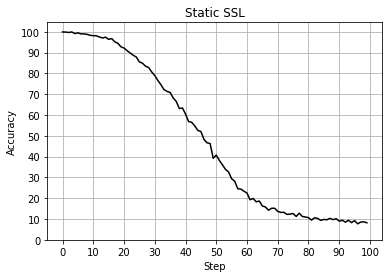

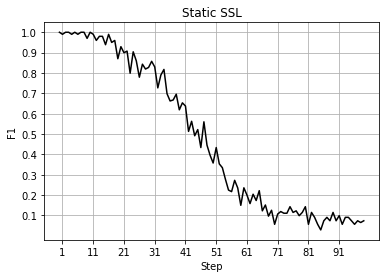




METHOD: Sliding lp as classifier
Execution time:  5.029877763805746
Average MCC:  0.594579422179
Average macro-F1: 0.7543129450152506
Average Accuracy:  77.1436
Standard Deviation:  12.4623413145
Variance:  155.30995104


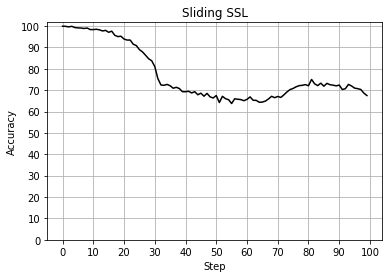

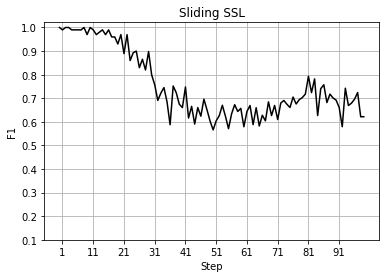




METHOD: Incremental lp as classifier
Execution time:  191.34549966874033
Average MCC:  -0.00158824178383
Average macro-F1: 0.49366402117140834
Average Accuracy:  49.3439
Standard Deviation:  37.0254934037
Variance:  1370.88716179


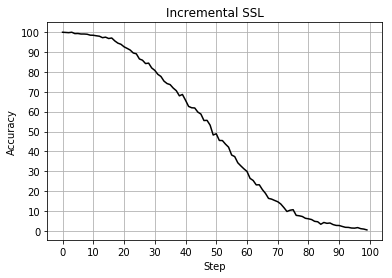

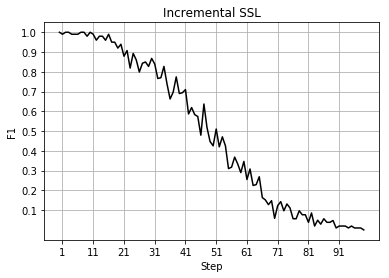




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  37.35694975638489
Average MCC:  0.83200278682
Average macro-F1: 0.9143229551052735
Average Accuracy:  91.3054
Standard Deviation:  7.18269760188
Variance:  51.59114484


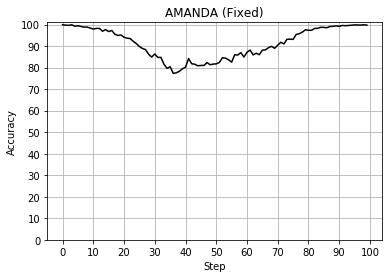

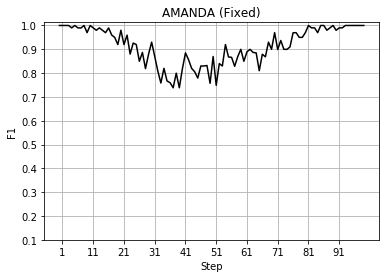




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  34.72224401648674
Average MCC:  0.709297315801
Average macro-F1: 0.8499116528737582
Average Accuracy:  85.125
Standard Deviation:  15.7206561886
Variance:  247.139031


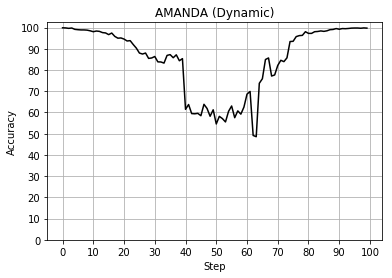

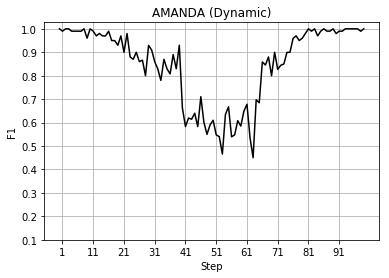




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  55.062728765703184
Average MCC:  0.016471977675
Average macro-F1: 0.505092648051131
Average Accuracy:  50.8301
Standard Deviation:  37.1559828694
Variance:  1380.56706299


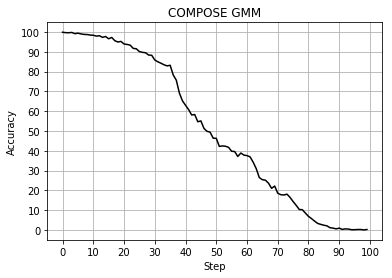

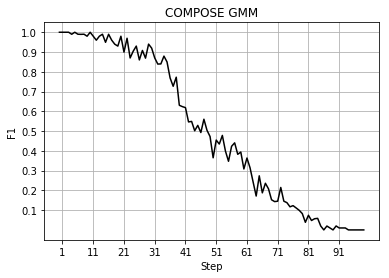




Method: Level IW
Execution time:  55.062728765703184
Average MCC:  -0.0110067683117
Average macro-F1: 0.49236966120850867
Average Accuracy:  90.698947
Standard Deviation:  7.46443492457
Variance:  55.7177887431


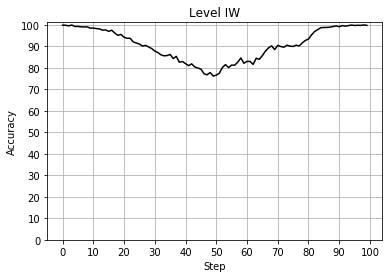

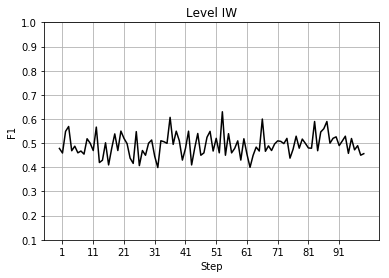

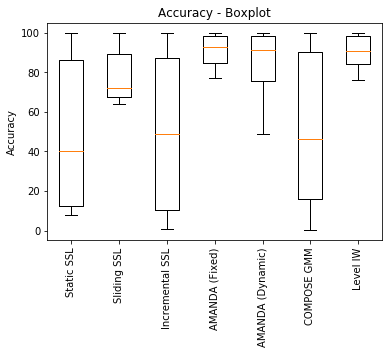

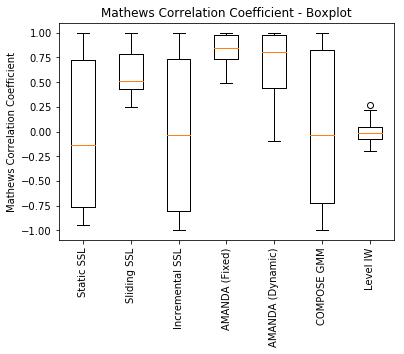

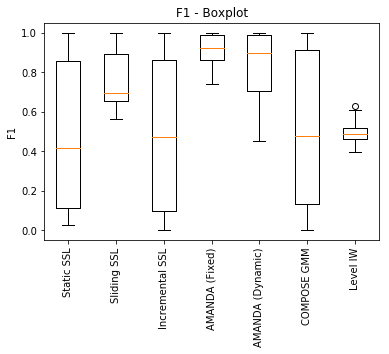

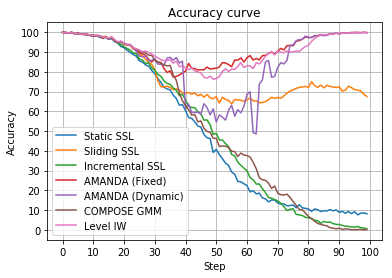

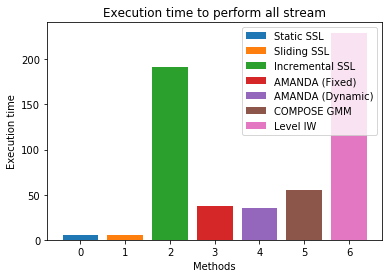

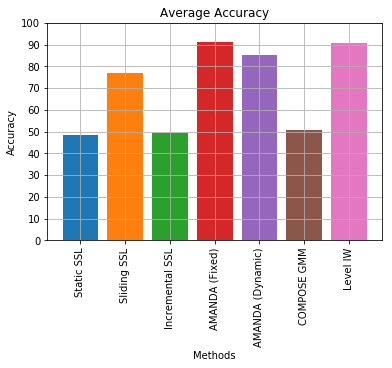

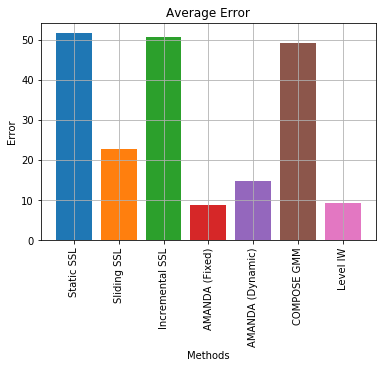

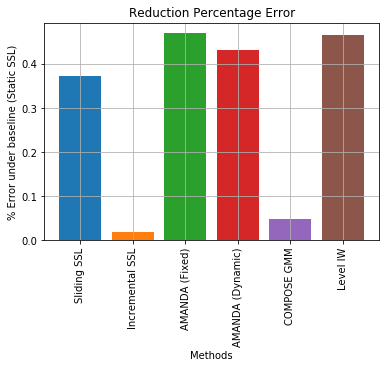

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadMG_2C_2D(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 11, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 11, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 11, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 11, 0.7, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 11, None, "kde", sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 11)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, 'MG_2C_2D', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()